In [1]:
import qutip
qutip.__version__

Matplotlib is building the font cache; this may take a moment.


'5.0.4'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, basis, sigmax, sigmay, sigmaz, mesolve, qeye, tensor
from qutip import expect, sigmax, sigmay, sigmaz

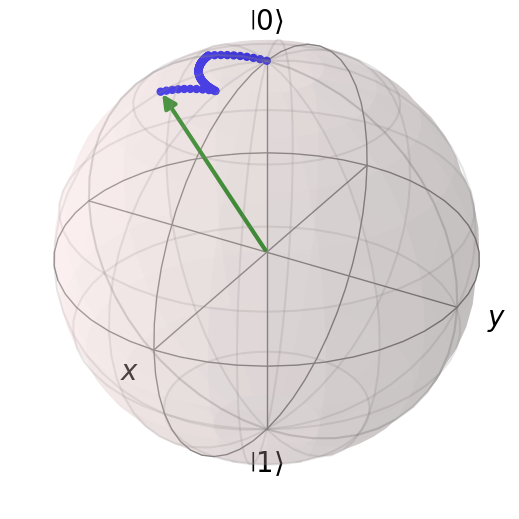

In [15]:
#steps:
#iniitalize state as ground state (i) then do pi/2 pulse (ii) then free evolve (iii) then pi/2 pulse (iv)
# defining time evolution parameters 
T = 1       # freee evolve time
N = 100     # time steps 
tlist = np.linspace(0, 2*T, N)

# (i) defining initial state in ground state |0>
psi0 = basis(2, 0) 

#(ii) define first pi/2 pulse as a rotation onto equitorial plane
H_pi2 = 0.5 * np.pi * sigmax()

# #free evolve using free evolution hamiltonina spcifies by detuning "delta"
delta = 2 * np.pi * 0.2  # Detuning in Hz
H_free = 0.5 * delta * sigmaz()

# enact (ii) first pi/2 puse
result1 = mesolve(H_pi2, psi0, np.linspace(0, T/10, N//10), [], [])

# enact (iii) free evolution
result2 = mesolve(H_free, result1.states[-1], np.linspace(0, T, N), [], [])

# enact (iv) second pi.2 pulse
result3 = mesolve(H_pi2, result2.states[-1], np.linspace(0, T/10, N//10), [], [])

# so i can plot a conitnuous evolutoin on blocch sphere and since mesolve only solves 1 evolution for specific evoltiun i am concatenating results from all three states
states = result1.states + result2.states + result3.states

x = [expect(sigmax(), psi) for psi in states]
y = [expect(sigmay(), psi) for psi in states]
z = [expect(sigmaz(), psi) for psi in states]
b = Bloch()
b.add_points([x, y, z]) #this will be hte trajectory 
b.add_vectors([x[-1], y[-1], z[-1]])  #this will be final state
b.show()


In [16]:
#weird.. im gonna plot them seperately 

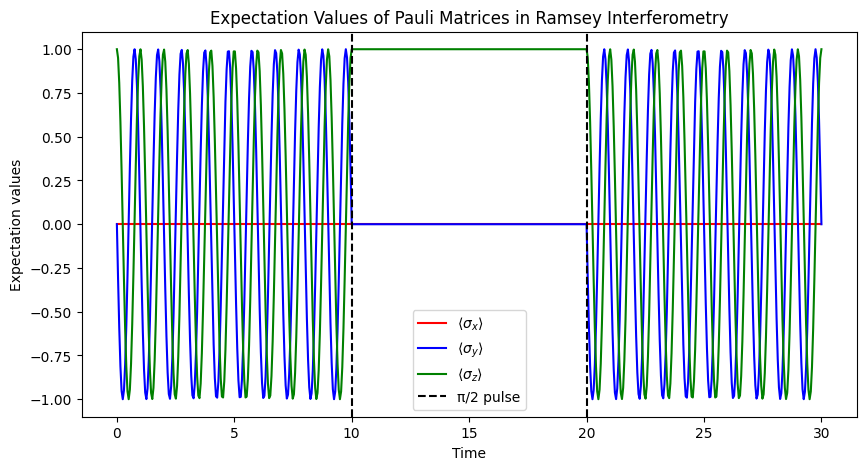

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
T = 10  # Total time
tlist = np.linspace(0, T, 200)  # Time steps

# Define basis states
psi0 = basis(2, 0)  # Initial state |0>

# Define Pauli matrices
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Ramsey sequence: π/2 pulse -> free evolution -> π/2 pulse
sigma = 2 * np.pi  # Rabi frequency
delta = 0.2  # Detuning

H1 = 0.5 * sigma * sx  # First π/2 pulse
H2 = 0.5 * delta * sz  # Free evolution
H3 = 0.5 * sigma * sx  # Second π/2 pulse

# Solve Schrödinger equation for each stage
result1 = mesolve(H1, psi0, tlist, [], [sx, sy, sz])
result2 = mesolve(H2, psi0, tlist, [], [sx, sy, sz])  # Start from psi0 again
result3 = mesolve(H3, psi0, tlist, [], [sx, sy, sz])

# Extract expectation values
x_expect = np.concatenate([result1.expect[0], result2.expect[0], result3.expect[0]])
y_expect = np.concatenate([result1.expect[1], result2.expect[1], result3.expect[1]])
z_expect = np.concatenate([result1.expect[2], result2.expect[2], result3.expect[2]])
t_total = np.concatenate([tlist, tlist + T, tlist + 2 * T])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_total, x_expect, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(t_total, y_expect, label=r'$\langle \sigma_y \rangle$', color='b')
plt.plot(t_total, z_expect, label=r'$\langle \sigma_z \rangle$', color='g')
plt.axvline(T, color="black", linestyle="--", label="π/2 pulse")
plt.axvline(2 * T, color="black", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.legend()
plt.title("Expectation Values of Pauli Matrices in Ramsey Interferometry")
plt.show()


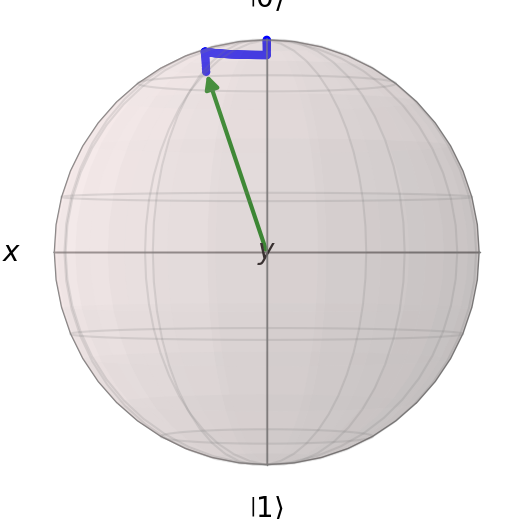

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

#steps:
#iniitalize state as ground state (i) then do pi/2 pulse (ii) then free evolve (iii) then pi/2 pulse (iv)

# defining time evolution parameters 
T = 1       # freee evolve time
N = 100     # time steps 
tlist = np.linspace(0, 2*T, N)

# (i) defining initial state in ground state |0>
psi0 = basis(2, 0) 

#(ii) define first pi/2 pulse as a rotation onto equitorial plane
H_pi2 = 0.5 * np.pi * sigmax()

# #free evolve using free evolution hamiltonina spcifies by detuning "delta"
delta = 2 * np.pi * 0.2  # Detuning in Hz
H_free = 0.5 * delta * sigmaz()

# enact (ii) first pi/2 puse
result1 = mesolve(H_pi2, psi0, np.linspace(0, T/10, N//10), [], [], options=Options(store_states=True))

# ensure states are stored
if not result1.states:
    raise ValueError("Error: result1.states is empty. Check mesolve setup.")

# enact (iii) free evolution
result2 = mesolve(H_free, result1.states[-1], np.linspace(0, T, N), [], [], options=Options(store_states=True))

if not result2.states:
    raise ValueError("Error: result2.states is empty. Check mesolve setup.")

# enact (iv) second pi.2 pulse
result3 = mesolve(H_pi2, result2.states[-1], np.linspace(0, T/10, N//10), [], [], options=Options(store_states=True))

if not result3.states:
    raise ValueError("Error: result3.states is empty. Check mesolve setup.")

# so i can plot a conitnuous evolutoin on blocch sphere and since mesolve only solves 1 evolution for specific evoltiun i am concatenating results from all three states
states = result1.states + result2.states + result3.states

x = [expect(sigmax(), psi) for psi in states]
y = [expect(sigmay(), psi) for psi in states]
z = [expect(sigmaz(), psi) for psi in states]

b = Bloch()
b.add_points([x, y, z]) #this will be hte trajectory 
b.add_vectors([x[-1], y[-1], z[-1]])  #this will be final state
b.view = [0, 0]
b.show()


In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import qutip

def spinup(n):
    return [[np.random.randint(2) - 1/2, np.random.randint(2) - 1/2, 1/2] 
            for i in range(n)]

def spindown(n):
    return [[np.random.randint(2) - 1/2, np.random.randint(2) - 1/2, -1/2] 
            for i in range(n)]

def all_S(spin_ensemble):
    return [sum(j[i] for j in spin_ensemble) for i in range(3)]

def single_spin_rotation_along_z(spin, amount):
    rotation_matrix = [[np.cos(amount), np.sin(amount), 0], 
                       [- np.sin(amount), np.cos(amount), 0], [0, 0, 1]]
    spin = np.dot(np.array(rotation_matrix), spin)
    return spin
    
def single_spin_rotation_along_y(spin, amount):
    rotation_matrix = [[np.cos(amount), 0, - np.sin(amount)], [0, 1, 0], 
                       [np.sin(amount), 0, np.cos(amount)]]
    spin = np.dot(np.array(rotation_matrix), spin)
    return spin

def single_spin_rotation_along_x(spin, amount):
    rotation_matrix = [[1, 0, 0], [0, np.cos(amount), -np.sin(amount)], 
                       [0, np.sin(amount), np.cos(amount)]]
    spin = np.dot(np.array(rotation_matrix), spin)
    return spin

def show_on_bloch(spin_realization, N):
    b = qutip.Bloch()
    b.sphere_alpha = 0.0
    b.frame_alpha = 0.05
    b.add_points(np.array([spin/np.sqrt(N/2*(N/2+1)) 
                            for spin in spin_realization]).T)
    b.point_color=['C0']
    b.point_marker = '.'
    b.zlabel = ['', '']
    b.render()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

def ramsey_sequence(N, theta1, theta2, time):
    """
    Simulate a Ramsey interferometer sequence.
    
    Parameters:
    N : int
        Number of atoms/spins.
    theta1 : float
        First pulse rotation angle (in radians).
    theta2 : float
        Second pulse rotation angle (in radians).
    time : float
        Free evolution time between pulses.
    
    Returns:
    tuple
        Expectation values for spin components.
    """
    # Initial state |+> state on x-axis
    psi0 = (qutip.basis(2, 0) + qutip.basis(2, 1)).unit()
    
    # Pauli Matrices
    sx = qutip.sigmax()
    sy = qutip.sigmay()
    sz = qutip.sigmaz()
    
    # Rotation operators
    R1 = qutip.rotation(sy, theta1)
    R2 = qutip.rotation(sy, theta2)
    
    # Free evolution Hamiltonian (assuming some detuning)
    delta = 1.0  # Detuning frequency
    H = delta * sz / 2
    U_free = (-1j * H * time).expm()
    
    # Apply the sequence: R1 -> Free Evolution -> R2
    psi_final = R2 * U_free * R1 * psi0
    
    # Expectation values
    sx_exp = qutip.expect(sx, psi_final)
    sy_exp = qutip.expect(sy, psi_final)
    sz_exp = qutip.expect(sz, psi_final)
    
    return sx_exp, sy_exp, sz_exp

def plot_ramsey():
    """Plot Ramsey fringe oscillations."""
    times = np.linspace(0, 10, 100)
    sx_vals, sz_vals = [], []
    
    for t in times:
        sx_exp, _, sz_exp = ramsey_sequence(1, np.pi/2, np.pi/2, t)
        sx_vals.append(sx_exp)
        sz_vals.append(sz_exp)
    
    plt.figure(figsize=(8,5))
    plt.plot(times, sx_vals, label='Sx Expectation')
    plt.plot(times, sz_vals, label='Sz Expectation')
    plt.xlabel('Time')
    plt.ylabel('Expectation Value')
    plt.title('Ramsey Interferometry Fringes')
    plt.legend()
    plt.show()

# Run the plot function
plot_ramsey()


AttributeError: module 'qutip' has no attribute 'rotation'

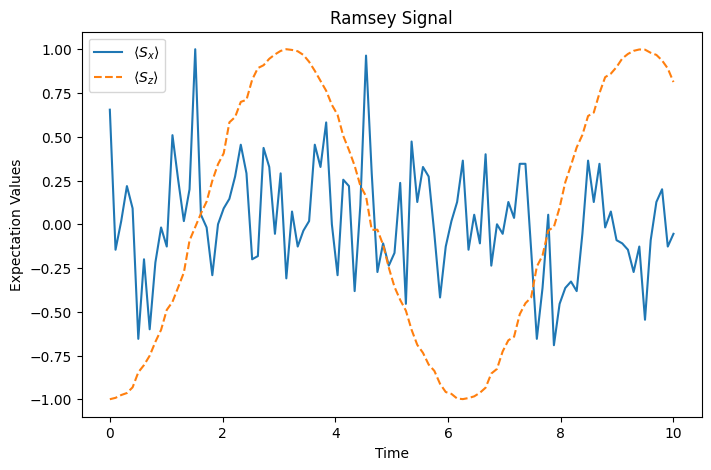

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

# Spin initialization functions
def spinup(n):
    return [[np.random.randint(2) - 1/2, np.random.randint(2) - 1/2, 1/2] for _ in range(n)]

def spindown(n):
    return [[np.random.randint(2) - 1/2, np.random.randint(2) - 1/2, -1/2] for _ in range(n)]

# Sum over all spins
def all_S(spin_ensemble):
    return [sum(j[i] for j in spin_ensemble) for i in range(3)]

# Spin rotation functions
def single_spin_rotation_along_z(spin, amount):
    rotation_matrix = [[np.cos(amount), np.sin(amount), 0], 
                       [-np.sin(amount), np.cos(amount), 0], 
                       [0, 0, 1]]
    return np.dot(rotation_matrix, spin)

def single_spin_rotation_along_y(spin, amount):
    rotation_matrix = [[np.cos(amount), 0, -np.sin(amount)], 
                       [0, 1, 0], 
                       [np.sin(amount), 0, np.cos(amount)]]
    return np.dot(rotation_matrix, spin)

def single_spin_rotation_along_x(spin, amount):
    rotation_matrix = [[1, 0, 0], 
                       [0, np.cos(amount), -np.sin(amount)], 
                       [0, np.sin(amount), np.cos(amount)]]
    return np.dot(rotation_matrix, spin)

# Bloch Sphere Visualization
def show_on_bloch(spin_realization, N):
    b = qutip.Bloch()
    b.sphere_alpha = 0.0
    b.frame_alpha = 0.05
    b.add_points(np.array([spin / np.sqrt(N/2*(N/2+1)) for spin in spin_realization]).T)
    b.point_color = ['C0']
    b.point_marker = '.'
    b.zlabel = ['z', '']
    b.render()

# Ramsey Sequence Function
def ramsey_sequence(n_spins, theta1, theta2, evolution_time):
    spins = spinup(n_spins)  # Initialize all spins in the up state

    # Apply first π/2 pulse along y
    spins = [single_spin_rotation_along_y(spin, theta1) for spin in spins]

    # Free evolution along z-axis
    spins = [single_spin_rotation_along_z(spin, evolution_time) for spin in spins]

    # Apply second π/2 pulse along y
    spins = [single_spin_rotation_along_y(spin, theta2) for spin in spins]

    # Compute expectation values
    sx_exp, sy_exp, sz_exp = all_S(spins)
    
    return sx_exp, sy_exp, sz_exp

# Plot the Ramsey Signal
def plot_ramsey():
    times = np.linspace(0, 10, 100)  # Evolution times
    sx_vals, sz_vals = [], []

    for t in times:
        sx_exp, _, sz_exp = ramsey_sequence(1000, np.pi/2, np.pi/2, t)
        sx_vals.append(sx_exp)
        sz_vals.append(sz_exp)

    # Normalize values
    sx_vals = np.array(sx_vals) / max(sx_vals)
    sz_vals = np.array(sz_vals) / max(sz_vals)

    plt.figure(figsize=(8, 5))
    plt.plot(times, sx_vals, label=r'$\langle S_x \rangle$')
    plt.plot(times, sz_vals, label=r'$\langle S_z \rangle$', linestyle='--')
    plt.xlabel("Time")
    plt.ylabel("Expectation Values")
    plt.legend()
    plt.title("Ramsey Signal")
    plt.show()

# Run the plot function
plot_ramsey()


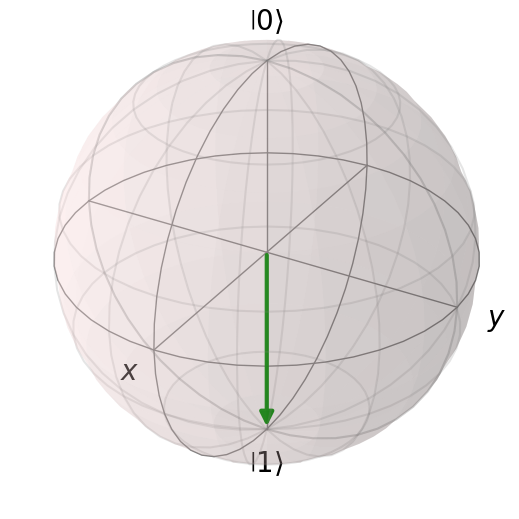

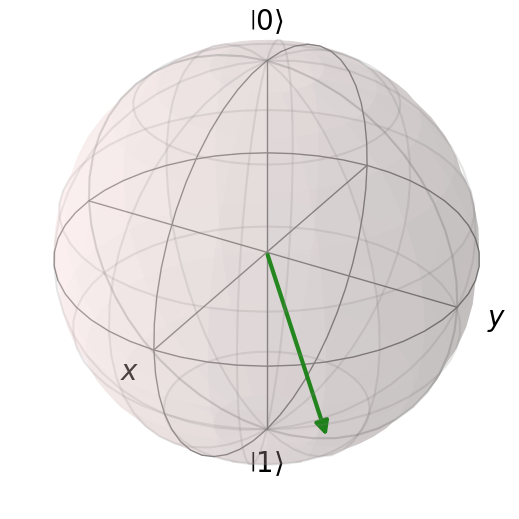

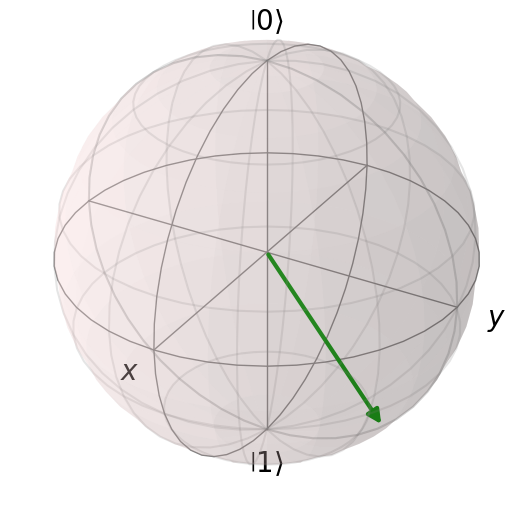

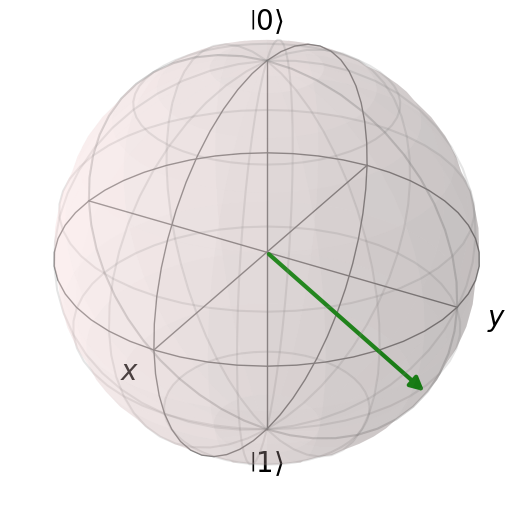

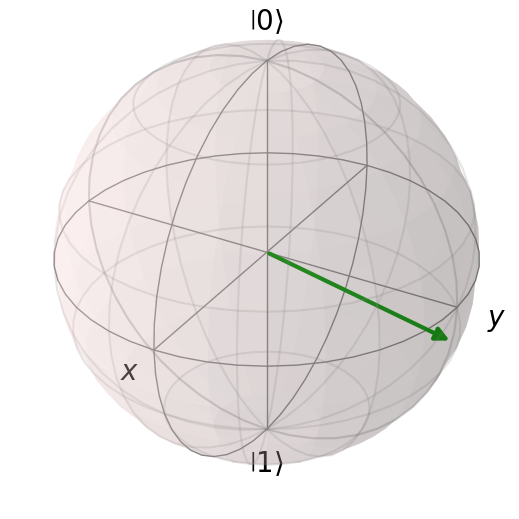

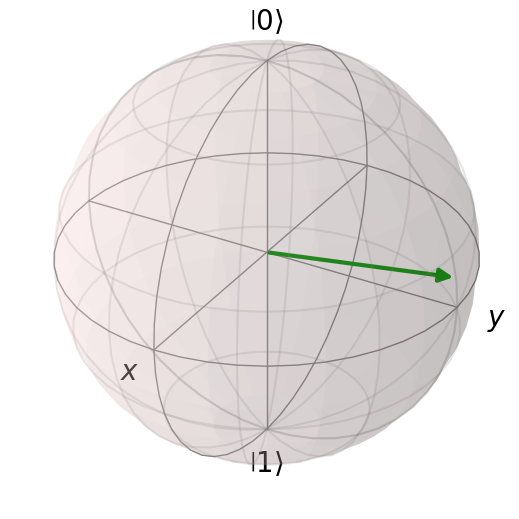

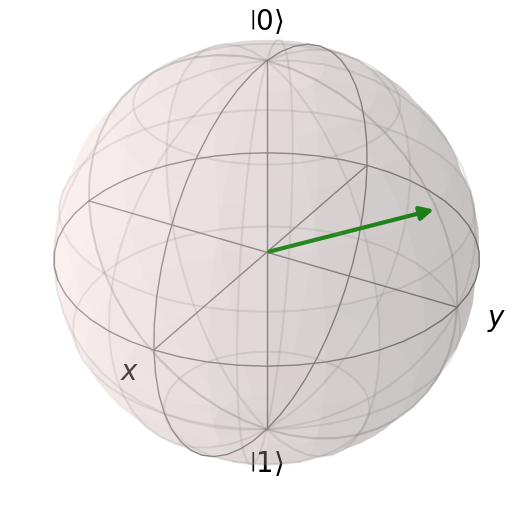

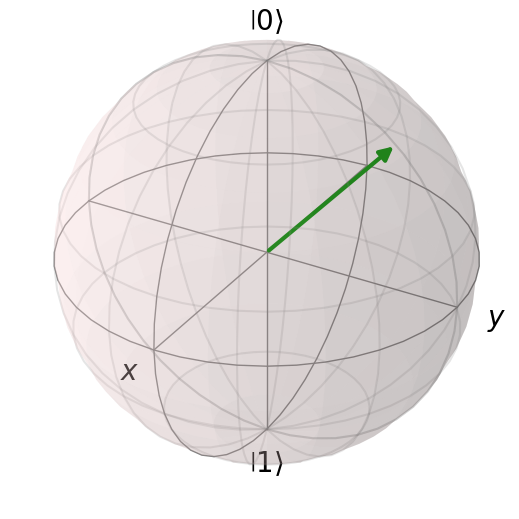

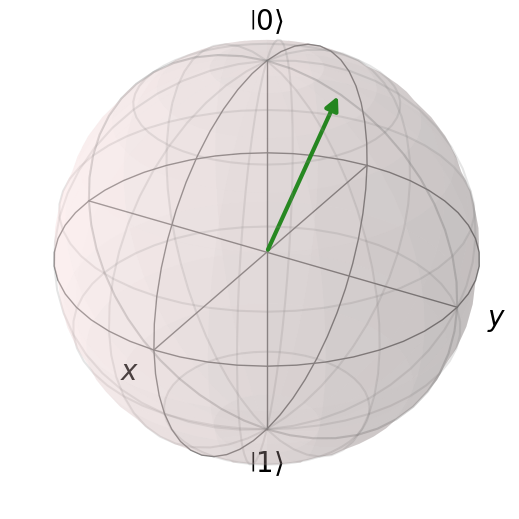

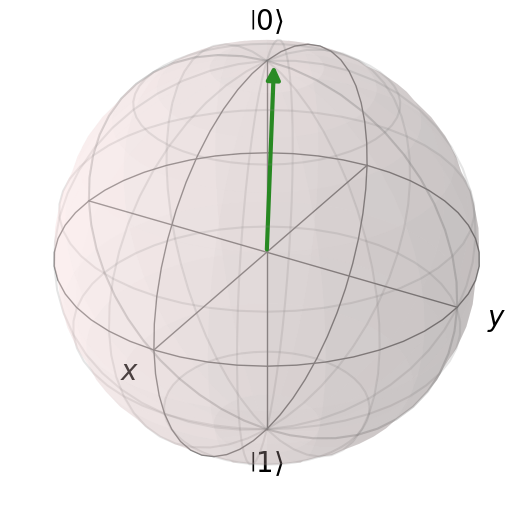

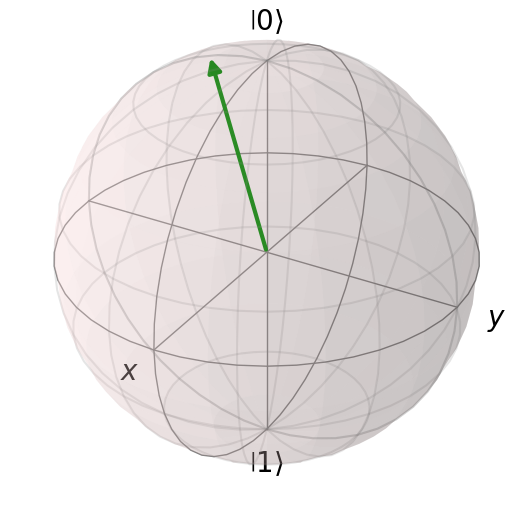

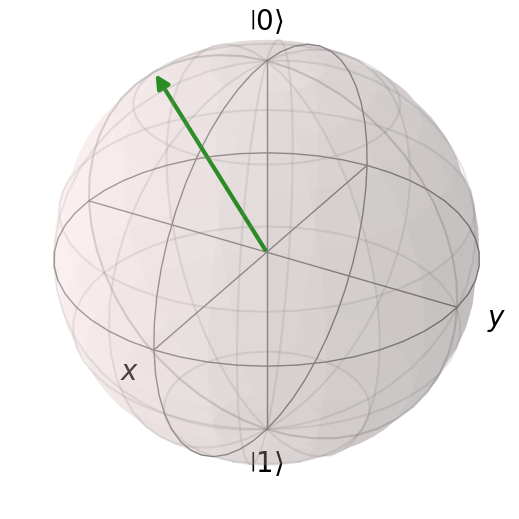

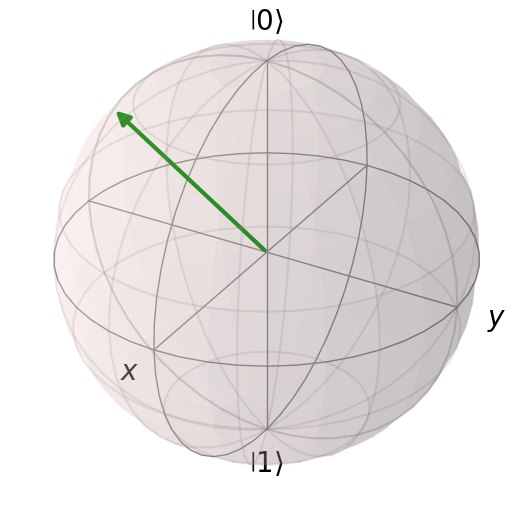

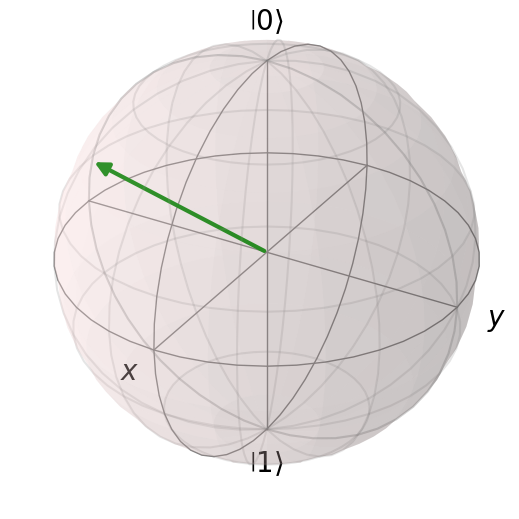

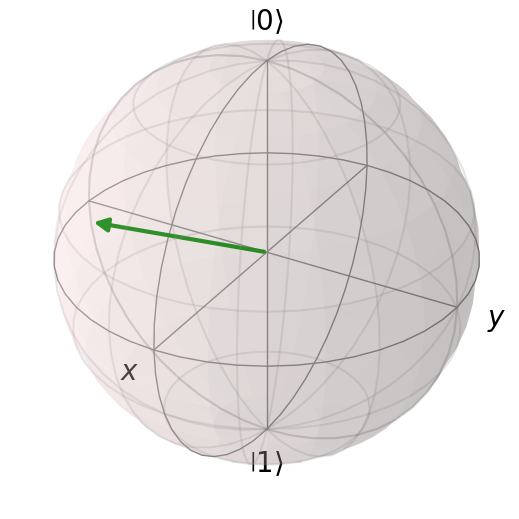

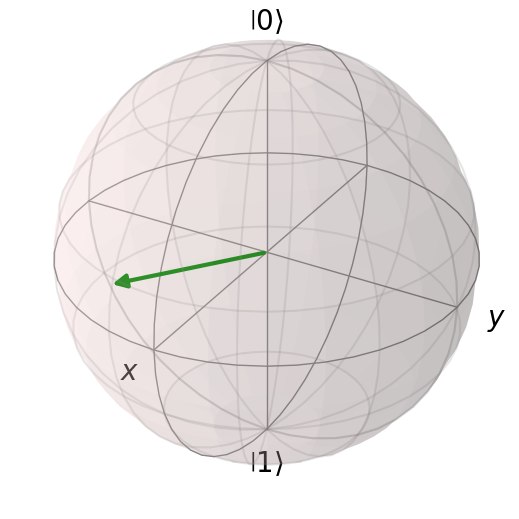

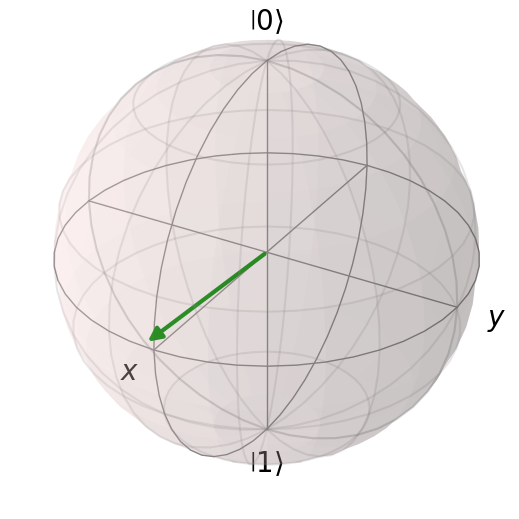

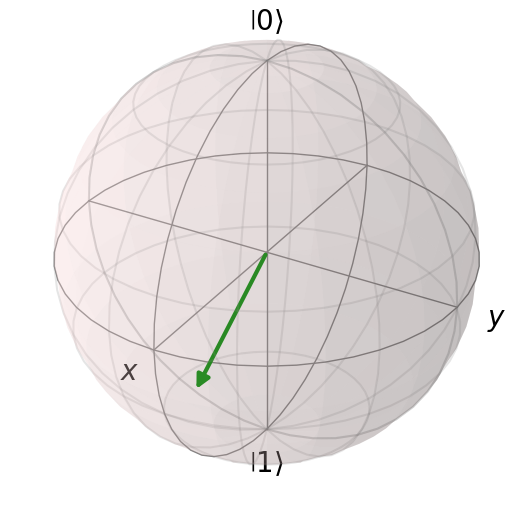

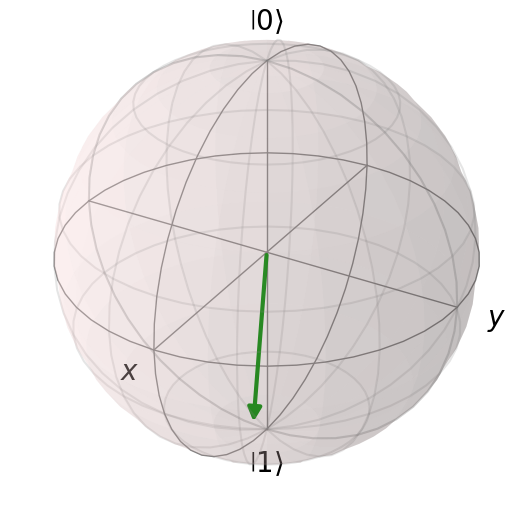

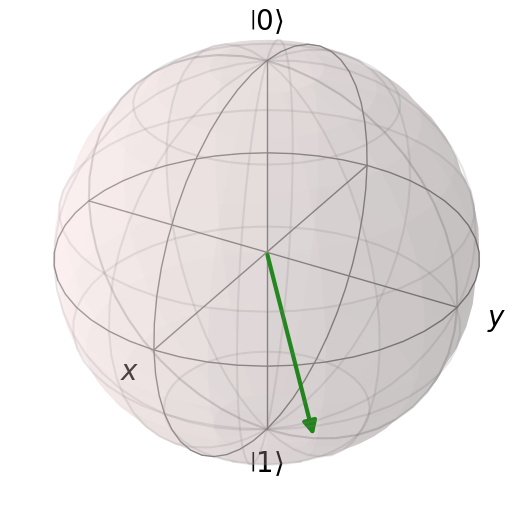

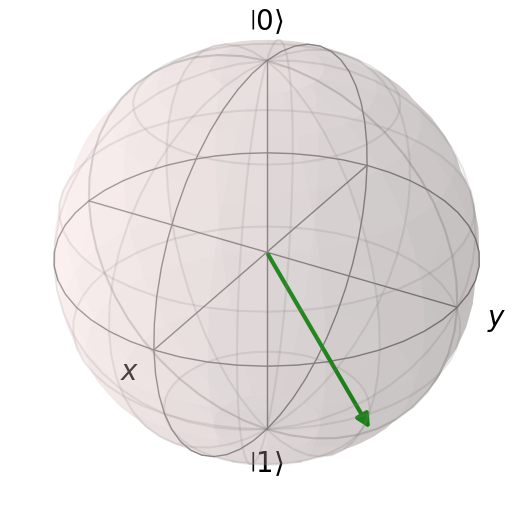

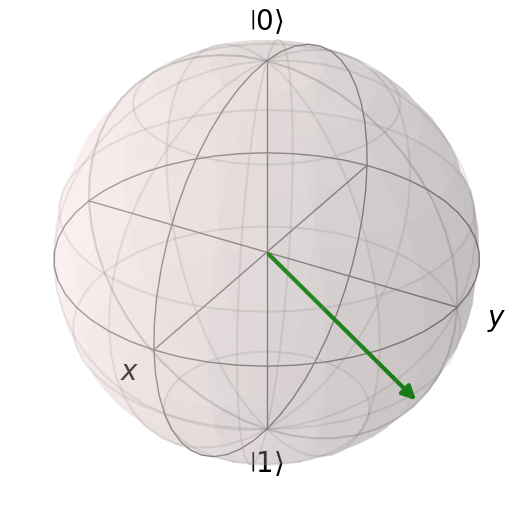

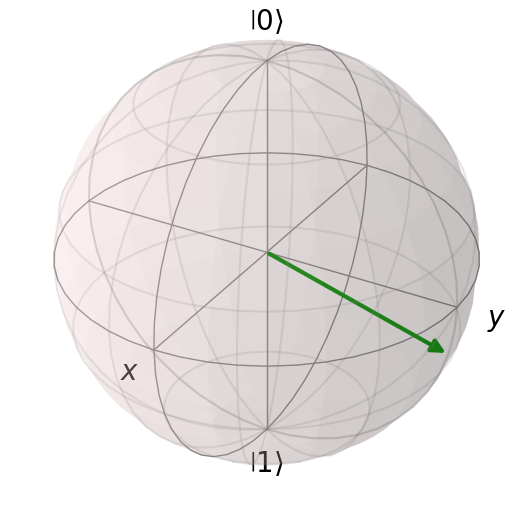

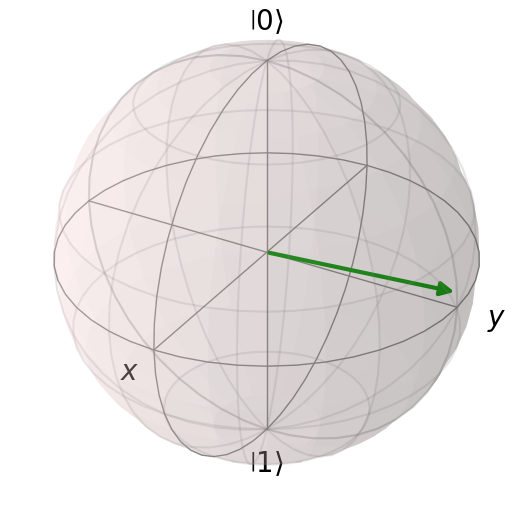

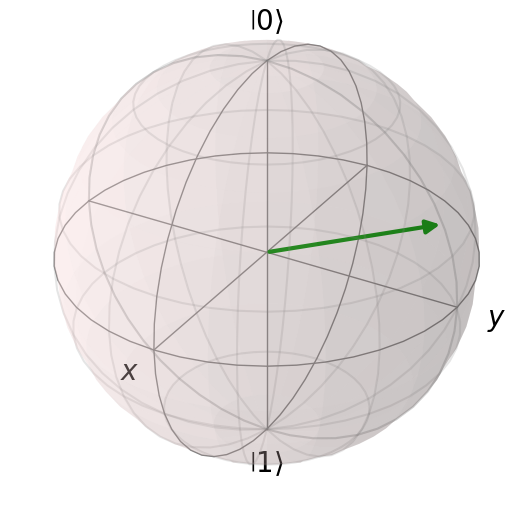

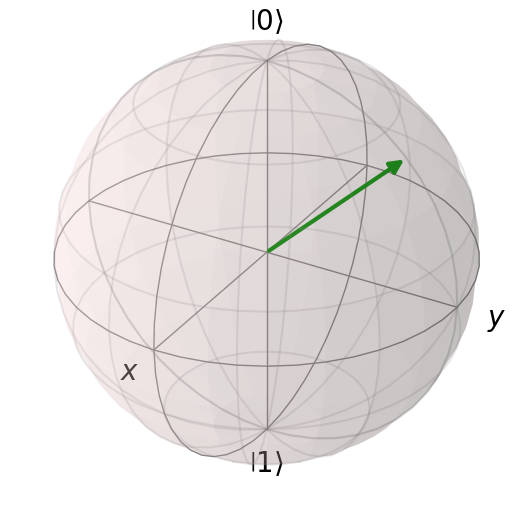

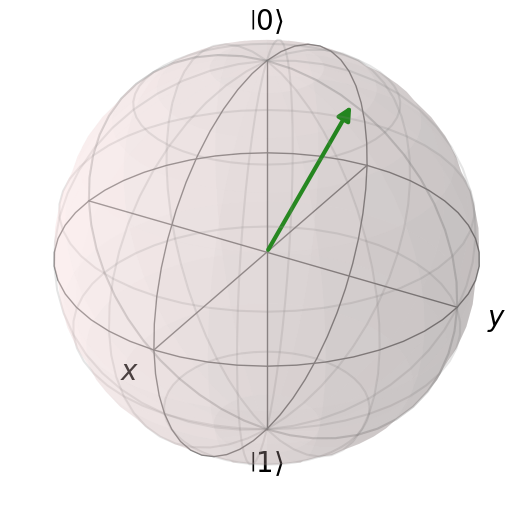

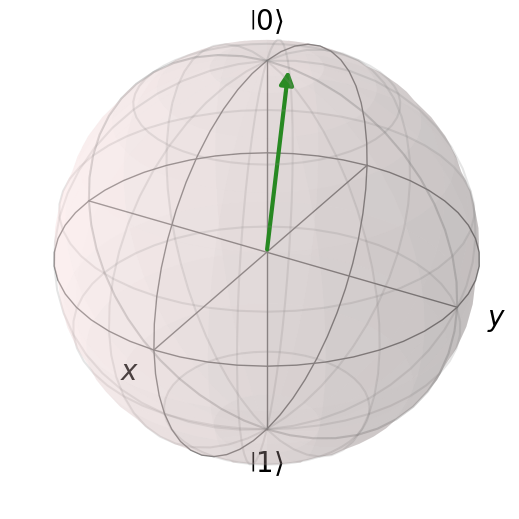

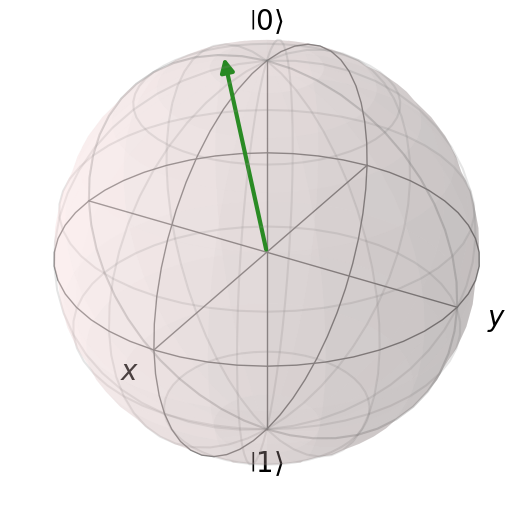

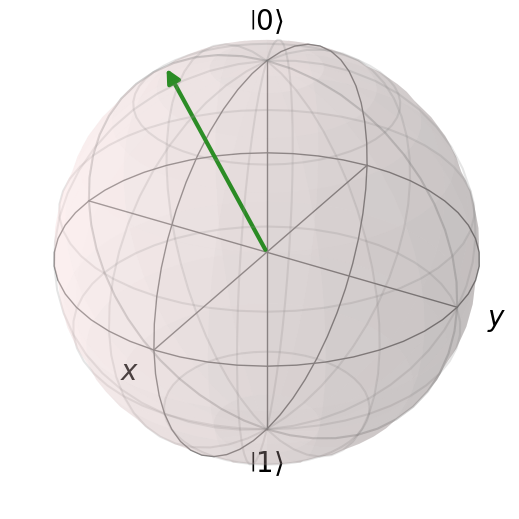

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

# Spin initialization functions
def spinup(n):
    return [[0, 0, 1] for _ in range(n)]  # Spins start in |↑⟩ (aligned along z-axis)

# Sum over all spins
def all_S(spin_ensemble):
    return [sum(j[i] for j in spin_ensemble) / len(spin_ensemble) for i in range(3)]

# Spin rotation functions
def single_spin_rotation_along_z(spin, amount):
    rotation_matrix = [[np.cos(amount), np.sin(amount), 0], 
                       [-np.sin(amount), np.cos(amount), 0], 
                       [0, 0, 1]]
    return np.dot(rotation_matrix, spin)

def single_spin_rotation_along_y(spin, amount):
    rotation_matrix = [[np.cos(amount), 0, -np.sin(amount)], 
                       [0, 1, 0], 
                       [np.sin(amount), 0, np.cos(amount)]]
    return np.dot(rotation_matrix, spin)

def single_spin_rotation_along_x(spin, amount):
    rotation_matrix = [[1, 0, 0], 
                       [0, np.cos(amount), -np.sin(amount)], 
                       [0, np.sin(amount), np.cos(amount)]]
    return np.dot(rotation_matrix, spin)

# Bloch Sphere Visualization
def show_on_bloch(spin_realization):
    """Plots spins on the Bloch sphere."""
    b = qutip.Bloch()
    b.add_vectors(spin_realization)  # Add spin expectation value as a vector
    b.show()

# Ramsey Sequence Function with Visualization
def ramsey_sequence(n_spins, theta1, theta2, evolution_time, visualize=True):
    spins = spinup(n_spins)  # Initialize all spins in |↑⟩ state (along z-axis)

    # Apply first π/2 pulse along y (brings spins to x-y plane)
    spins = [single_spin_rotation_along_y(spin, theta1) for spin in spins]

    # Free evolution around z-axis
    spins = [single_spin_rotation_along_z(spin, evolution_time) for spin in spins]

    # Apply second π/2 pulse along y
    spins = [single_spin_rotation_along_y(spin, theta2) for spin in spins]

    # Compute expectation values
    sx_exp, sy_exp, sz_exp = all_S(spins)

    if visualize:
        show_on_bloch([sx_exp, sy_exp, sz_exp])  # Show the average spin on Bloch sphere

    return sx_exp, sy_exp, sz_exp

# Animate Bloch Sphere Over Time
def animate_ramsey():
    times = np.linspace(0, 10, 30)  # Evolution times
    for t in times:
        ramsey_sequence(1000, np.pi/2, np.pi/2, t, visualize=True)

# Run the visualization
animate_ramsey()


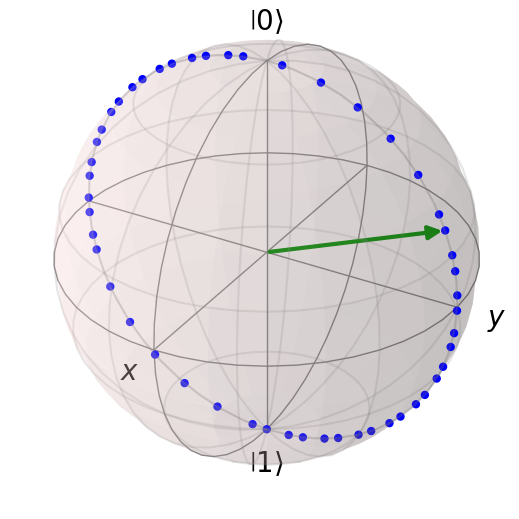

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

# Spin initialization function
def spinup(n):
    return [[0, 0, 1] for _ in range(n)]  # Spins start in |↑⟩ (aligned along z-axis)

# Sum over all spins (expectation values)
def all_S(spin_ensemble):
    return [sum(j[i] for j in spin_ensemble) / len(spin_ensemble) for i in range(3)]

# Rotation functions
def single_spin_rotation_along_z(spin, amount):
    rotation_matrix = [[np.cos(amount), np.sin(amount), 0], 
                       [-np.sin(amount), np.cos(amount), 0], 
                       [0, 0, 1]]
    return np.dot(rotation_matrix, spin)

def single_spin_rotation_along_y(spin, amount):
    rotation_matrix = [[np.cos(amount), 0, -np.sin(amount)], 
                       [0, 1, 0], 
                       [np.sin(amount), 0, np.cos(amount)]]
    return np.dot(rotation_matrix, spin)

# Bloch Sphere Trajectory Function
def ramsey_trajectory(n_spins, theta1, theta2, times):
    spins = spinup(n_spins)  # Initialize all spins in |↑⟩ state (along z-axis)
    trajectory = []  # To store spin evolution

    for t in times:
        # Apply first π/2 pulse along y (brings spins to x-y plane)
        spins = [single_spin_rotation_along_y(spin, theta1) for spin in spins]

        # Free evolution around z-axis
        spins = [single_spin_rotation_along_z(spin, t) for spin in spins]

        # Apply second π/2 pulse along y
        spins = [single_spin_rotation_along_y(spin, theta2) for spin in spins]

        # Compute expectation values
        sx_exp, sy_exp, sz_exp = all_S(spins)
        trajectory.append([sx_exp, sy_exp, sz_exp])

    return np.array(trajectory).T  # Convert to 3D array for Bloch sphere

# Plot trajectory on a single Bloch Sphere
def plot_bloch_trajectory():
    times = np.linspace(0, 10, 50)  # Evolution times
    trajectory = ramsey_trajectory(1000, np.pi/2, np.pi/2, times)

    b = qutip.Bloch()
    b.add_points(trajectory)  # Add trajectory points
    b.add_vectors(trajectory[:, -1])  # Mark the final state
    b.show()

# Run visualization
plot_bloch_trajectory()


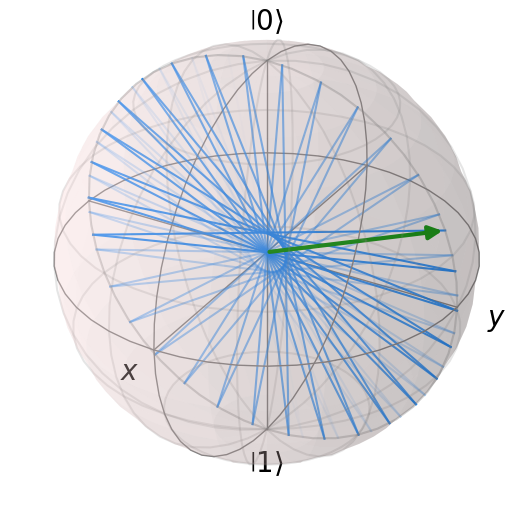

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

def spinup(n):
    return [[0, 0, 1] for _ in range(n)]  # Spins start aligned along the z-axis

def all_S(spin_ensemble):
    return [sum(j[i] for j in spin_ensemble) / len(spin_ensemble) for i in range(3)]

def single_spin_rotation_along_z(spin, amount):
    rotation_matrix = [[np.cos(amount), np.sin(amount), 0], 
                       [-np.sin(amount), np.cos(amount), 0], 
                       [0, 0, 1]]
    return np.dot(rotation_matrix, spin)

def single_spin_rotation_along_y(spin, amount):
    rotation_matrix = [[np.cos(amount), 0, -np.sin(amount)], 
                       [0, 1, 0], 
                       [np.sin(amount), 0, np.cos(amount)]]
    return np.dot(rotation_matrix, spin)

def ramsey_trajectory(n_spins, theta1, theta2, times):
    spins = spinup(n_spins)
    trajectory = []

    for t in times:
        spins = [single_spin_rotation_along_y(spin, theta1) for spin in spins]
        spins = [single_spin_rotation_along_z(spin, t) for spin in spins]
        spins = [single_spin_rotation_along_y(spin, theta2) for spin in spins]

        sx_exp, sy_exp, sz_exp = all_S(spins)
        trajectory.append([sx_exp, sy_exp, sz_exp])

    return np.array(trajectory).T

def plot_bloch_trajectory():
    times = np.linspace(0, 10, 50)
    trajectory = ramsey_trajectory(1000, np.pi/2, np.pi/2, times)

    b = qutip.Bloch()
    colors = [(0, 0.5, 1, i / len(times)) for i in range(len(times))]  

    for i in range(len(times) - 1):
        start, end = trajectory[:, i], trajectory[:, i + 1]
        b.add_line(start, end, color=colors[i])

    b.add_vectors(trajectory[:, -1])
    b.show()

plot_bloch_trajectory()
